<img style="float: left;" src="my_logo.png" width="100" height="150"/>



# Project Description 
### Water Point Data Analysis

#### 01- Data Cleaning

### Recall: Listing all tasks
* Selecting informative columns [pending task 1]
* Cleaning Column Names [pending task 2]
* Nesting the huge unique value count in the categorical features [pending task 3]
* Splitting columns with categorical code and answers [pending task 4]
* Extracting Location data [pending task 5]
* Converting dataset from a pandas to a geodataframe [pending task 6]

In [2]:
import numpy as np
import pandas as pd
import os
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
%matplotlib inline

# Auto reloads notebook when changes are made
# %reload_ext autoreload
# %autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
#Importing shapefiles
df_1 = gpd.read_file('Shapefiles/SL_Districts.shp',index_col=0)
df_2 = gpd.read_file('Shapefiles/SL_Chiefdoms.shp',index_col=0)

In [4]:
## choosing informative columns in shapefiles
## 1. District shapefile
sl_dis = df_1[['name_0', 'name_1','name_2','geometry']]
sl_dis.columns = ['Country','Province','District', 'geometry']

## 2. Chiefdom shapefile
sl_chief = df_2[['name_0', 'name_1','name_2','name_3','geometry']]
sl_chief.columns = ['Country','Province','District','chiefdom', 'geometry']

#checking the CRS
sl_chief.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Importing the WP Data

In [5]:
#Importing CSV data from path
datafiles = glob.glob('WP_ALL DATA\\*.csv')
datafiles

['WP_ALL DATA\\Water-point-data-SL.csv',
 'WP_ALL DATA\\WP Master.csv',
 'WP_ALL DATA\\WP_Eastern.csv',
 'WP_ALL DATA\\WP_Northern.csv',
 'WP_ALL DATA\\WP_Southern.csv',
 'WP_ALL DATA\\WP_Western.csv']

In [7]:
#Merging all the file data
wp_data = pd.concat(pd.read_csv(datafile) 
                    for datafile in datafiles)

# wp_data.head()
print('The shape of the merged data is :', wp_data.shape)
# wp_data.columns
# wp_data.isnull().sum()
# wp_data.head(2)
# print(wp_data.isnull().sum())

The shape of the merged data is : (62313, 96)


### Importing Master data merged form Xcell

In [9]:
## importing dataset as 'data'
data=pd.read_csv('WP_ALL DATA/WP Master.csv')
print('The shape of the merged data is :', data.shape)
data.head(2)

The shape of the merged data is : (26207, 52)


,Submission Date,16230052|EA number,7420032|Community Name,7430032|Water point Name,5420051|Location,2420047|Latitude,--GEOLON--|Longitude,--GEOELE--|Elevation,--GEOCODE--|Geo Code,4430050|Photo,...,8480002|Are there trained natural ODF leaders in this community?,1530002|Are the trained natural ODF leaders performing their role effectively?,4690001|Observations about toilet,6740003|Observe presence of water at the specific place for hand washing,3830002|Observe what device is present for hand washing,3810002|Record if soap or detergent is present at the specific place for hand washing,Field49,chiefdom,District,Region
0,30-07-2016 19:55:22 CEST,14,semabu,Community pump,South|Bonthe|Bonthe Urban|Bonthe Town,7.523658,-12.500999,50,9lmqrpu9,https://akvoflow-110.s3.amazonaws.com/images/d...,...,<Null>,<Null>,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,72849e96c5fe978793072373c77cae1,Dema,Bonthe,Southern
1,01-01-2016 21:16:53 CET,7,mabonto,magburaka road,Tonkolili|Kafe Simiria|Mabonto,8.860831,-11.812625,150.1,bb270dny,https://akvoflow-110.s3.amazonaws.com/images/e...,...,<Null>,<Null>,6:Toilet looks good,2:Water is not available,1:No device present,5:None,f0563f79f4dcc28f9d5877242bffc0f7,Kafe Simira,Tonkolili,Northern


### Extracting Location data [pending task 5]


In [23]:
# Seperating District and Chiefdom from Location
### The code below had difficulting in stripping
''' df1['District'] = df1.Location.str.findall('Kenema|Port Loko|Western Rural|Bo\|Moyamba|Tonkolili\
                            |Bonthe|Kailahun|Bombali|Kambia|Kono|Koinadugu|Pujehun|Western Urban').copy()
                            '''
''' Solution: I used the shapefiles 'sl_Dist' and 'sl_Chief' above and did spatial join in ArcGisPro
'''

" Solution: I used the shapefiles 'sl_Dist' and 'sl_Chief' above and did spatial join in ArcGisPro\n"

### Converting dataset from a pandas to a geodataframe [completing task 6]

In [19]:
# converting data to geodataframe
## Rename the longitude and latitude columns for conveniency
data.rename(columns={'2420047|Latitude':'latitude',
                     '--GEOLON--|Longitude':'longitude',
                     '5420051|Location':'Location'}, inplace=True)
# Inspecting Longitude/latitude coverage
## Sierra Leone lies within Latitude 8.460555 and longitude -11.779889
print('The minimum longitude is: ',data['longitude'].min())
print('The minimum latitude is: ',data['latitude'].min())
print('The number of columns is: ', len(data))

##converting df to GDF
df1 = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs= "EPSG:4326")
df1.head(2)

The minimum longitude is:  -13.292313
The minimum latitude is:  6.932476
The number of columns is:  26207


,Submission Date,16230052|EA number,7420032|Community Name,7430032|Water point Name,Location,latitude,longitude,--GEOELE--|Elevation,--GEOCODE--|Geo Code,4430050|Photo,...,1530002|Are the trained natural ODF leaders performing their role effectively?,4690001|Observations about toilet,6740003|Observe presence of water at the specific place for hand washing,3830002|Observe what device is present for hand washing,3810002|Record if soap or detergent is present at the specific place for hand washing,Field49,chiefdom,District,Region,geometry
0,30-07-2016 19:55:22 CEST,14,semabu,Community pump,South|Bonthe|Bonthe Urban|Bonthe Town,7.523658,-12.500999,50,9lmqrpu9,https://akvoflow-110.s3.amazonaws.com/images/d...,...,<Null>,7:No toilet in household / not applicable,2:Water is not available,1:No device present,5:None,72849e96c5fe978793072373c77cae1,Dema,Bonthe,Southern,POINT (-12.50100 7.52366)
1,01-01-2016 21:16:53 CET,7,mabonto,magburaka road,Tonkolili|Kafe Simiria|Mabonto,8.860831,-11.812625,150.1,bb270dny,https://akvoflow-110.s3.amazonaws.com/images/e...,...,<Null>,6:Toilet looks good,2:Water is not available,1:No device present,5:None,f0563f79f4dcc28f9d5877242bffc0f7,Kafe Simira,Tonkolili,Northern,POINT (-11.81263 8.86083)


### Selecting informative columns [Task 1]


### Cleaning Column Names [Task 2]
{Unchanged}  
('old name': `new name`)
* {`Region`, `District`, `Chiefdom`,`Latitude`,`Longitude`,`Elevation`, `GEOCODE`, `Photo`}
* ('Submission Date':`sub_date`)
* ('7430032|Water point Name':`wp Name`)
* ('4420041|Extraction system type': `extract_type`)
* ('5450040|Type of water point':`wp_type`)
* ('7430035|Water point Functionality': `wp_func`)
* ('4390041|Is water available throughout the year?': `wp_sustain`)
* ('6430039|Is/was this point monthly or regularly chlorinated?' :`chlorination`) 
* ('4430055|Year of construction': `const_year`)
* ('4390044|Who owns the water point?': `ownership`)
* ('7430040|Is there a trained mechanic available at this point?': `wp_mechanic`)
* ('4380054|Who is maintaining the water point (routine repairs)?': `maintenance`)
* ('7380052|Is there a WASH management committee?': `WASH_team`)
* ('460037|How many minutes does it take to reach the nearest spare part supplier?': `t_toSpares?`)
* (1500002|Has the community been declared ODF?': `commu_ODF?`)

In [21]:
#creating a dataframe with desired columns
df2 = df1[['Submission Date','Region','District','chiefdom',
       '7430032|Water point Name','latitude', 'longitude',
       '5450040|Type of water point', '4420041|Extraction system type',
       '440041|Pump type','7430035|Water point Functionality',
       '4380053|Last time the water point broke down, how long did it take to repair?',
       '6430039|Is/was this point monthly or regularly chlorinated?',
       '4390041|Is water available throughout the year?',
       '7420038|Is the water paid for at this point?',
       '4430055|Year of construction',
       '4390044|Who owns the water point?',
       '4380054|Who is maintaining the water point (routine repairs)?',
       '7380052|Is there a WASH management committee?',
       '510001|Is the WASH management committee functioning?',
       '7430040|Is there a trained mechanic available at this point?',
       '460037|How many minutes does it take to reach the nearest spare part supplier?',
       '1500002|Has the community been declared ODF?','geometry']]
## renaming columns
df2.columns = ['sub_date','Region','District', 'Chiefdom','wp name', 'latitude', 'longitude','wp_type',
                    'extract_type','pump_type','wp_func','repair_time','chlorination','wp_sustain','wp_billed',
                    'const_year','ownership','maintenance','WASH_team','WASHteam_func','wp_mechanic',
                    't_toSpares?','commu_ODF','geometry']

In [35]:
# dropping columns where the null values is > 1%
# df = data.drop(data.columns[data.isnull().mean()>0.01], axis = 1)

## exploring df2
df2.isnull().sum()
df2.describe()
print(df2.shape)

(26207, 24)


In [37]:
## drop duplicate and non important features
# wp_join = wp_joined.drop(columns=['latitude_right','index_right',
#                             'longitude_right','GEOCODE','Photo'],
#                             axis=1, inplace=True)
# print(wp_join.head())

# print(df2['extract_type'].value_counts())
# df2.columns

### Splitting columns with categorical code and answers [Task 4]


In [39]:
#columns to clean
cols = ['Region', 'District','wp_type', 'wp_func', 'wp_sustain',
        'ownership','maintenance','WASHteam_func','pump_type',
        'WASH_team','extract_type','repair_time','wp_billed']

## clean the columns and assign the values back to the dataframe
df2[cols] = df2[cols].apply(lambda col: col.str.split(':', n=1).str.get(-1))
df2.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,sub_date,Region,District,Chiefdom,wp name,latitude,longitude,wp_type,extract_type,pump_type,...,wp_billed,const_year,ownership,maintenance,WASH_team,WASHteam_func,wp_mechanic,t_toSpares?,commu_ODF,geometry
0,30-07-2016 19:55:22 CEST,Southern,Bonthe,Dema,Community pump,7.523658,-12.500999,Tube well or borehole,Hand pump,India Mark II,...,No payment – its free,2012,Community,No management,Unknown,<Null>,Unknown,85,Don't know,POINT (-12.50100 7.52366)
1,01-01-2016 21:16:53 CET,Northern,Tonkolili,Kafe Simira,magburaka road,8.860831,-11.812625,Protected spring,<Null>,<Null>,...,No payment – its free,1987,Community,WASH management committee,Yes,Yes,Yes,180,No,POINT (-11.81263 8.86083)


### Nesting the huge unique value count in the categorical features [Task 3]


#### Inspecting categorical features

In [40]:
## finding unique values in each feature
dfu = pd.DataFrame(df2.nunique()) 
dfu

,0
sub_date,25623
Region,5
District,15
Chiefdom,152
wp name,15499
latitude,25560
longitude,25611
wp_type,92
extract_type,176
pump_type,12


#### Methodology
Several columns needs to be nested as there are duplicate categories
1. wp_type # =67
2. maintenance # =199
3. extract_type  # =176 
4. Pump_type  # =47
5. wp_billed # =54
6. Const_year # =76
7. wp_mechanic # =31

''' To be able to achieve nesting, three techniques will bw used: Mapping, if-elif and regex-replacements
'''


### 1. wp_type

In [42]:
## inspecting categories of 'wp type'
# pd.set_option ('display.max_rows', None)
print(df2['wp_type'].value_counts())

Protected dug well                                  12384
Public tap/standpipe (stand-alone or water kiosk     4148
Unprotected dug well                                 3993
Tube well or borehole                                2205
Piped water into dwelling/plot/yard                  1900
Sand/Sub-surface dam (with well or standpipe)         498
Protected spring                                      389
Surface water (lake/river/stream)                     187
Unprotected spring                                     91
Unequipped borehole                                    64
Rainwater (harvesting)                                 59
Hand pump                                              51
handpump                                               31
Dam/pan (runoff harvesting)                            30
Handpump                                               17
Protected Shallow Well                                 15
hand pump                                              11
              

In [45]:
## Since there are a lot of categories that can be melted into bigger categories, we create a new category 
# to do  this, we create a regex code
replacements = {
r'Protected dug well': 'protec dug_well',
r'Unprotected dug well': 'unprotec dug_well',
r'Public tap/standpipe (\stand-alone or water kiosk)\n': 'public tap/kiosk',
r'Tube well or borehole ': 'borewell',
r'Piped water into dwelling/plot/yard ': 'public tap in priv',
r'Sand/Sub-surface dam (with well or standpipe)': 'public tap',
r'Protected spring': 'spring_protec',
r'Surface water (lake/river/stream)': 'surface_water',
r'Unprotected spring': 'spring_unprotec',
r'Unequipped borehole':'borewell', 
r'Rainwater (harvesting)': 'rainwater_harvesting',
r'Protected Shallow Well': 'protec dug_well',
r'Dam/pan (runoff harvesting)': 'mini_gravity',
r'stand tap': 'public tap',
r'Gravity': 'gravity_scheme',
r'Drilled well': 'borewell',
r'Stand tap': 'public tap',
r'': 'public tap', 
r'Tap': 'public tap',
r'stand pipe': 'public tap',
r'Unprotected Tank': 'public tap',
r'protected drill well': 'public tap',
r'gravitty': 'gravity_scheme',
r'protected shallow well': 'protec dug_well',
r'Submasive pump': 'borewell', #Intution that submersive pumps are frequently installed in Borewells
r'tap': 'public tap',
r'Unfinished Well': 'unprotec dug_well', #Well is unfinished hence not protected
r'school quarter tap': 'public tap/kiosk', #classified as public since it is not in private area
r'drilled well': 'borewell',   
r'Emas drilled well': 'borewell', #well is drilled hence its a borewell
r'stream': 'surface_water',
r'Water tank': 'public tap', #water tanks are always connected to taps below the tanks                                            1
r'Open Hand dug well': 'unprotec dug_well',
r'Hand pump':'protec dug_well',  # this can also be categorized in borewell  
r'Water  well': 'unprotec dug_well', #purely based on intution
r'spring box': 'spring_protec',
r'Gravity Tap':'gravity_scheme',
r'Under ground source':'spring_unprotected',
r'dam':'gravity_scheme',
r'no pump':'unprotec dug_well',
r'Protected hand dug with submerssible pump':'protec dug_well',
r'Underconstruction':'protec dug_well', #assume it is being used manually
r'InComplete':'unprotec dug_well',
r'Under Construction':'unprotec dug_well',
r'storage tank':'public tap',
r'\-': '',
}

In [47]:
df2['wp_type'].replace(regex=replacements, inplace=True)

In [48]:
print(df2['wp_type'].value_counts())

protec dug_well                                                  12453
Public public public tap/standpipe (standalone or water kiosk     4148
unprotec dug_well                                                 3999
Tube well or borehole                                             2205
Piped water into dwelling/plot/yard                               1900
Sand/Subsurface gravity_scheme (with well or standpipe)            498
spring_protec                                                      391
Surface water (lake/river/surface_water)                           187
spring_unprotec                                                     91
borewell                                                            71
Rainwater (harvesting)                                              59
handpump                                                            31
Dam/pan (runoff harvesting)                                         30
public public tap                                                   22
Handpu

In [49]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def wtype_v(x):
    if (x == 'Handpump'or x == 'handpump'or x == 'hand pump'or x == 'protec dug_well'):
        return 'protected dug_well'
    elif (x =='Public public public tap/standpipe (standalone or water kiosk'
          or x == 'Piped water into dwelling/plot/yard'or x == 'public public public tap'
          or x == 'public public tap'or x == 'public public public tap'):
        return 'public tap/standpipe'
    elif (x == 'unprotec dug_well'):
        return 'Unprotected dug_well'
    elif (x == 'borewell'or x == 'Tube well or borehole'):
          return 'borewell'
    elif (x == 'Sand/Subsurface gravity_scheme (with well or standpipe)'
          or x == 'gravity_scheme'):
          return 'gravity scheme'
    elif (x == 'spring_protec'):
          return 'protected spring'
    elif (x == 'Rainwater (harvesting)' or x == 'Dam/pan (runoff harvesting)'):
          return 'rainwater harvesting'
    elif (x == 'water tank'):
          return 'water tank'
    else:
        return 'OTHER'
df2['wp_type'] = df2['wp_type'].apply(wtype_v)
# df2.head()

# # creating a dictionary to assign values 
# pop_dict = { "Kailahun": 526399, "Kenema": 609891, "Kono": 506100,"Bombali": 606544,
#             "Kambia": 345474,"Koinadugu": 409372,"Port Loko": 615376,"Tonkolili": 531435,
#             "Bo": 575478, 'Bonthe': 200781, "Moyamba": 318588,"Pujehun": 346461,"Western Rural": 444270,
#             "Western Urban": 1055964}
# #passing the column into a data frame
# df2['Dist_pop'] = df2['District'].map(pop_dict)
# df2.columns

# a["abc"] = [1, 2]



C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [50]:
print(df2['wp_type'].value_counts())

protected dug_well      12512
public tap/standpipe     6082
Unprotected dug_well     3999
borewell                 2276
gravity scheme            507
protected spring          391
OTHER                     347
rainwater harvesting       89
water tank                  4
Name: wp_type, dtype: int64


### maintenance

In [28]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def main_v(x):
    if (x == 'Community' or x == 'community people' or x == 'Community itself'
        or x == 'COMMUNITY' or x == 'community' or x == 'Community People'
        or x == 'Community leaders'or x == 'Community leaders'):
        return 'Community'
    elif (x == 'Privat owner Other' or x == 'WASH management committee'
          or x == 'School' or x == 'No management' or x == 'NGO' or x == 'Health Facility'
          or x == 'Uknown' or x == 'SALWACO' or x == 'Other Institution'
          or x == 'Local council' or x == 'GUMA'):
        return x 
    else:
        return 'other'
df2['maintenance'] = df2['maintenance'].apply(main_v)
print(df2['maintenance'].value_counts())

other                        13918
WASH management committee     5340
School                        1889
No management                 1179
Health Facility                675
NGO                            619
Uknown                         576
SALWACO                        544
Other Institution              474
Community                      403
Local council                  369
GUMA                           221
Name: maintenance, dtype: int64


### extract_type

In [29]:
print(df2['extract_type'].value_counts())

Hand pump                                                  12134
Hand manual (e.g. rope pump, rope & bucket)                 6075
Gravity                                                     3158
<Null>                                                      2979
Hydram pump                                                  677
Submersible pump                                             474
Surface pump                                                  89
tap                                                           71
run through tap                                               54
RUN IN PIPE                                                   40
RUNS THROUGH TAP                                              36
RUNNING TAP                                                   27
under construction                                            27
RUN THROUGH PIPE                                              21
Tap                                                           21
No pump                  

In [30]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def extyp_v(x):
    if (x == 'Hand pump' or x == 'Gravity' 
       or x == 'Hydram pump' or x == 'Submersible pump'
       or x == 'Surface pump'):
        return x 
    elif (x == 'Hand manual (e.g. rope pump, rope & bucket)'):
        return 'Hand manual (e.g. rope pump, rope & bucket)'
    elif (x == 'tap'or x == 'run through tap'or x == 'RUN IN PIPE'or 
          x == 'RUNS THROUGH TAP' or x == 'RUNNING TAP'or x == 'Tap'
          or x == 'RUN THROUGH PIPE'):
        return 'Tap'
    elif (x == 'supplied by bowser' or x == 'water trucking'):
        return 'Water Trucking'
    else:
        return 'OTHER'
df2['extract_type'] = df2['extract_type'].apply(extyp_v)
# df2.head()
print(df2['extract_type'].value_counts())

Hand pump                                      12134
Hand manual (e.g. rope pump, rope & bucket)     6075
OTHER                                           3307
Gravity                                         3158
Hydram pump                                      677
Submersible pump                                 474
Tap                                              270
Surface pump                                      89
Water Trucking                                    23
Name: extract_type, dtype: int64


### pump_type

In [31]:
print(df2['pump_type'].value_counts())

<Null>              13984
India Mark II        7428
Kardia               1574
Unidentified          945
PB Mark II            693
India Mark            539
Afridev               390
Inkar                 238
India Mark III        218
Bucket                168
Vergnet footpump       16
Consallen              14
Name: pump_type, dtype: int64


In [32]:
## since only one valeu needs reclass, we use the .replace method
df2['pump_type'] = df2['pump_type'].replace('<Null>', 'OTHER')
print(df2['pump_type'].value_counts())

OTHER               13984
India Mark II        7428
Kardia               1574
Unidentified          945
PB Mark II            693
India Mark            539
Afridev               390
Inkar                 238
India Mark III        218
Bucket                168
Vergnet footpump       16
Consallen              14
Name: pump_type, dtype: int64


### wp_billed

In [33]:
print(df2['wp_billed'].value_counts())

No payment – its free                                                                                         18098
<Null>                                                                                                         5901
Yes, Flat rate (LE/HH/month)                                                                                   1107
Only after system breakdown                                                                                     476
Yes, Per jerrican 20L                                                                                           462
Yes, Metered (LE/m3)                                                                                            106
Not Applicable                                                                                                    5
No water                                                                                                          3
water rate                                                              

In [34]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def wp_bill(x):
    if (x == 'No payment – its free'):
        return 'No payment' 
    elif (x == '<Null>'):
        return 'Unknown'
    elif (x == 'Yes, Flat rate (LE/HH/month)'):
        return 'Yes, Monthly'
    elif (x == 'Yes, Per jerrican 20L' or x == 'Yes, Metered (LE/m3)'):
        return x
    else:
        return 'OTHER'
df2['wp_billed'] = df2['wp_billed'].apply(wp_bill)
# df2.head()
print(df2['wp_billed'].value_counts())

No payment               18098
Unknown                   5901
Yes, Monthly              1107
OTHER                      533
Yes, Per jerrican 20L      462
Yes, Metered (LE/m3)       106
Name: wp_billed, dtype: int64


### const_year

Most of the well were constructed in the 2000's. 
After 2009, construction pe year exceeds 1000. Therefore, no furthger classification 
was done after 2010

In [35]:
## convert year from string to numerical
# df2['const_year'] = df2['const_year'].apply(pd.to_numeric, errors='coerce', axis=1)
df2.const_year = df2.const_year.astype(int)


In [36]:
print(df2['const_year'].value_counts())

2013    2008
2012    1712
2014    1663
2016    1626
2015    1577
2010    1540
2011    1391
2008    1086
2009    1052
2003     911
2004     899
2005     860
1986     837
2006     831
2002     784
2007     744
2000     717
2001     449
1985     438
1990     403
1989     353
1987     348
1992     321
1988     300
1998     287
1999     253
1984     249
1980     247
1982     242
1930     233
1991     213
1996     210
1995     183
1994     169
1993     132
1997     128
1970     120
1983      88
1972      68
1978      51
1975      49
1976      41
1960      40
1981      37
1973      35
1945      34
1979      27
1950      22
1965      20
1962      18
1967      17
1974      15
1968      13
1977      12
1940      11
1956      11
1946      10
1971       9
2017       7
1964       7
1935       6
1955       6
1952       6
1954       5
1966       3
1961       3
1933       3
1963       3
1958       2
1943       2
1969       2
1932       2
1957       2
1942       2
1934       1
1931       1
Name: const_

In [37]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def cons_yr(x):
        if (x < 1950):
            return 'Before 1950'
        elif (x < 2000):
            return '1950 - 2000'
        elif (x < 2005):
            return '2001 - 2005'
        elif (x < 2010):
            return '2005 - 2010'
        else:
            return x
df2['const_yr'] = df2['const_year'].apply(cons_yr)

In [38]:
print(df2['const_yr'].value_counts())

1950 - 2000    6045
2005 - 2010    4573
2001 - 2005    3760
2013           2008
2012           1712
2014           1663
2016           1626
2015           1577
2010           1540
2011           1391
Before 1950     305
2017              7
Name: const_yr, dtype: int64


### wp_mechanic

In [39]:
print(df2['wp_mechanic'].value_counts())

No                                                                                                                                                 12006
Yes                                                                                                                                                 7578
<Null>                                                                                                                                              4599
Unknown                                                                                                                                             1978
Volunteer plumber                                                                                                                                      3
Don't know                                                                                                                                             1
guma                                                                              

In [40]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def wp_mech(x):
    if (x == 'No'):
        return 'No Mechanic' 
    elif ((x == '<Null>') | (x =='Unknown')):
        return 'Unknown'
    elif (x == 'Yes'):
        return 'Mechanic present'
    else:
        return 'OTHER'
df2['wp_mechanic'] = df2['wp_mechanic'].apply(wp_mech)
# df2.head()
print(df2['wp_mechanic'].value_counts())

No Mechanic         12006
Mechanic present     7578
Unknown              6577
OTHER                  46
Name: wp_mechanic, dtype: int64


### For the maintenance column, the categories were further nested into sub categories as follows
### Unchanged categories
*'Privat owner Other','community group',
*'WASH management committee',
*'School',
*'No management',
*'NGO',
*'Health Facility'
*'SALWACO',
*'Local council',
*'GUMA'
#### 'Community'
*'Community','community people','Community itself' 
#### 'Others'
*'Uknown',*'Other Institution' ---> 


In [41]:
# rescaling the maintenance features. There are 199 categories hence this will be rescaled to 16 categories
def main_v(x):
    if (x == 'Community' or x == 'community people' or x == 'Community itself'
        or x == 'COMMUNITY' or x == 'community' or x == 'Community People'
        or x == 'Community leaders'or x == 'Community leaders'):
        return 'Community'
    elif (x == 'Privat owner Other' or x == 'WASH management committee'
          or x == 'School' or x == 'No management' or x == 'NGO' or x == 'Health Facility'
          or x == 'Uknown' or x == 'SALWACO' or x == 'Other Institution'
          or x == 'Local council' or x == 'GUMA'):
        return x 
    else:
        return 'other'
df2['maintenance'] = df2['maintenance'].apply(main_v)
df2.head(2)

,sub_date,Region,District,Chiefdom,wp name,latitude,longitude,wp_type,extract_type,pump_type,...,const_year,ownership,maintenance,WASH_team,WASHteam_func,wp_mechanic,t_toSpares?,commu_ODF,geometry,const_yr
0,30-07-2016 19:55:22 CEST,Southern,Bonthe,Dema,Community pump,7.523658,-12.500999,borewell,Hand pump,India Mark II,...,2012,Community,No management,Unknown,<Null>,Unknown,85,Don't know,POINT (-12.50100 7.52366),2012
1,01-01-2016 21:16:53 CET,Northern,Tonkolili,Kafe Simira,magburaka road,8.860831,-11.812625,protected spring,OTHER,OTHER,...,1987,Community,WASH management committee,Yes,Yes,Mechanic present,180,No,POINT (-11.81263 8.86083),1950 - 2000


In [42]:
df2.nunique()

sub_date         25623
Region               5
District            15
Chiefdom           152
wp name          15499
latitude         25560
longitude        25611
wp_type              9
extract_type         9
pump_type           12
wp_func              6
repair_time          7
chlorination         4
wp_sustain           3
wp_billed            6
const_year          76
ownership           11
maintenance         12
WASH_team            3
WASHteam_func        4
wp_mechanic          4
t_toSpares?        359
commu_ODF            4
geometry         26016
const_yr            12
dtype: int64

In [43]:
print(df2['extract_type'].value_counts())

Hand pump                                      12134
Hand manual (e.g. rope pump, rope & bucket)     6075
OTHER                                           3307
Gravity                                         3158
Hydram pump                                      677
Submersible pump                                 474
Tap                                              270
Surface pump                                      89
Water Trucking                                    23
Name: extract_type, dtype: int64


In [44]:
df2.head(2)

,sub_date,Region,District,Chiefdom,wp name,latitude,longitude,wp_type,extract_type,pump_type,...,const_year,ownership,maintenance,WASH_team,WASHteam_func,wp_mechanic,t_toSpares?,commu_ODF,geometry,const_yr
0,30-07-2016 19:55:22 CEST,Southern,Bonthe,Dema,Community pump,7.523658,-12.500999,borewell,Hand pump,India Mark II,...,2012,Community,No management,Unknown,<Null>,Unknown,85,Don't know,POINT (-12.50100 7.52366),2012
1,01-01-2016 21:16:53 CET,Northern,Tonkolili,Kafe Simira,magburaka road,8.860831,-11.812625,protected spring,OTHER,OTHER,...,1987,Community,WASH management committee,Yes,Yes,Mechanic present,180,No,POINT (-11.81263 8.86083),1950 - 2000


### WASHteam_func

In [45]:
print(df2['WASHteam_func'].value_counts())

<Null>        16424
Yes            8425
No             1200
Don't know      158
Name: WASHteam_func, dtype: int64


In [46]:
## replacing Null with OTHERS
df2['WASHteam_func'] = df2['WASHteam_func'].replace('<Null>', 'Don\'t know')
print(df2['WASHteam_func'].value_counts())

Don't know    16582
Yes            8425
No             1200
Name: WASHteam_func, dtype: int64


#### District

In [47]:
### merge Falaba and Koinadugu district since survey was done before the split

In [48]:
## replacing Null with OTHERS
df2['District'] = df2['District'].replace('<Null>', 'Koinadugu')
print(df2['District'].value_counts())

Kenema           4265
Bo               3822
Port Loko        2780
Western Urban    1934
Koinadugu        1910
Kailahun         1885
Western Rural    1874
Bombali          1479
Tonkolili        1254
Bonthe           1226
Kono             1223
Pujehun          1047
Kambia            821
Moyamba           687
Name: District, dtype: int64


### repair_time

In [49]:
## replacing Null with OTHERS
df2['repair_time'] = df2['repair_time'].replace('<Null>', 'Unknown')
print(df2['repair_time'].value_counts())

Water point has never broken down    8014
Over a month                         5605
More than a year                     5124
I don't know                         2628
Over a week                          2243
Less than a week                     2146
Unknown                               447
Name: repair_time, dtype: int64


### Adding population data by District

In [57]:
# creating a dictionary to assign values 
pop_dict = { "Kailahun": 526399, "Kenema": 609891, "Kono": 506100,"Bombali": 606544,
            "Kambia": 345474,"Koinadugu": 409372,"Port Loko": 615376,"Tonkolili": 531435,
            "Bo": 575478, 'Bonthe': 200781, "Moyamba": 318588,"Pujehun": 346461,"Western Rural": 444270,
            "Western Urban": 1055964}
#passing the column into a data frame
df2['Dist_pop'] = df2['District'].map(pop_dict)
df2.columns

Index(['sub_date', 'Region', 'District', 'Chiefdom', 'wp name', 'latitude',
       'longitude', 'wp_type', 'extract_type', 'pump_type', 'wp_func',
       'repair_time', 'chlorination', 'wp_sustain', 'wp_billed', 'const_year',
       'ownership', 'maintenance', 'WASH_team', 'WASHteam_func', 'wp_mechanic',
       't_toSpares?', 'commu_ODF', 'geometry', 'const_yr', 'Dist_pop'],
      dtype='object')

In [58]:
print(df2['Dist_pop'].value_counts())

609891     4265
575478     3822
615376     2780
1055964    1934
409372     1910
526399     1885
444270     1874
606544     1479
531435     1254
200781     1226
506100     1223
346461     1047
345474      821
318588      687
Name: Dist_pop, dtype: int64


In [59]:
df2.head(2)

,sub_date,Region,District,Chiefdom,wp name,latitude,longitude,wp_type,extract_type,pump_type,...,ownership,maintenance,WASH_team,WASHteam_func,wp_mechanic,t_toSpares?,commu_ODF,geometry,const_yr,Dist_pop
0,30-07-2016 19:55:22 CEST,Southern,Bonthe,Dema,Community pump,7.523658,-12.500999,borewell,Hand pump,India Mark II,...,Community,No management,Unknown,Don't know,Unknown,85,Don't know,POINT (-12.50100 7.52366),2012,200781
1,01-01-2016 21:16:53 CET,Northern,Tonkolili,Kafe Simira,magburaka road,8.860831,-11.812625,protected spring,OTHER,OTHER,...,Community,WASH management committee,Yes,Yes,Mechanic present,180,No,POINT (-11.81263 8.86083),1950 - 2000,531435


## Visualising Maps

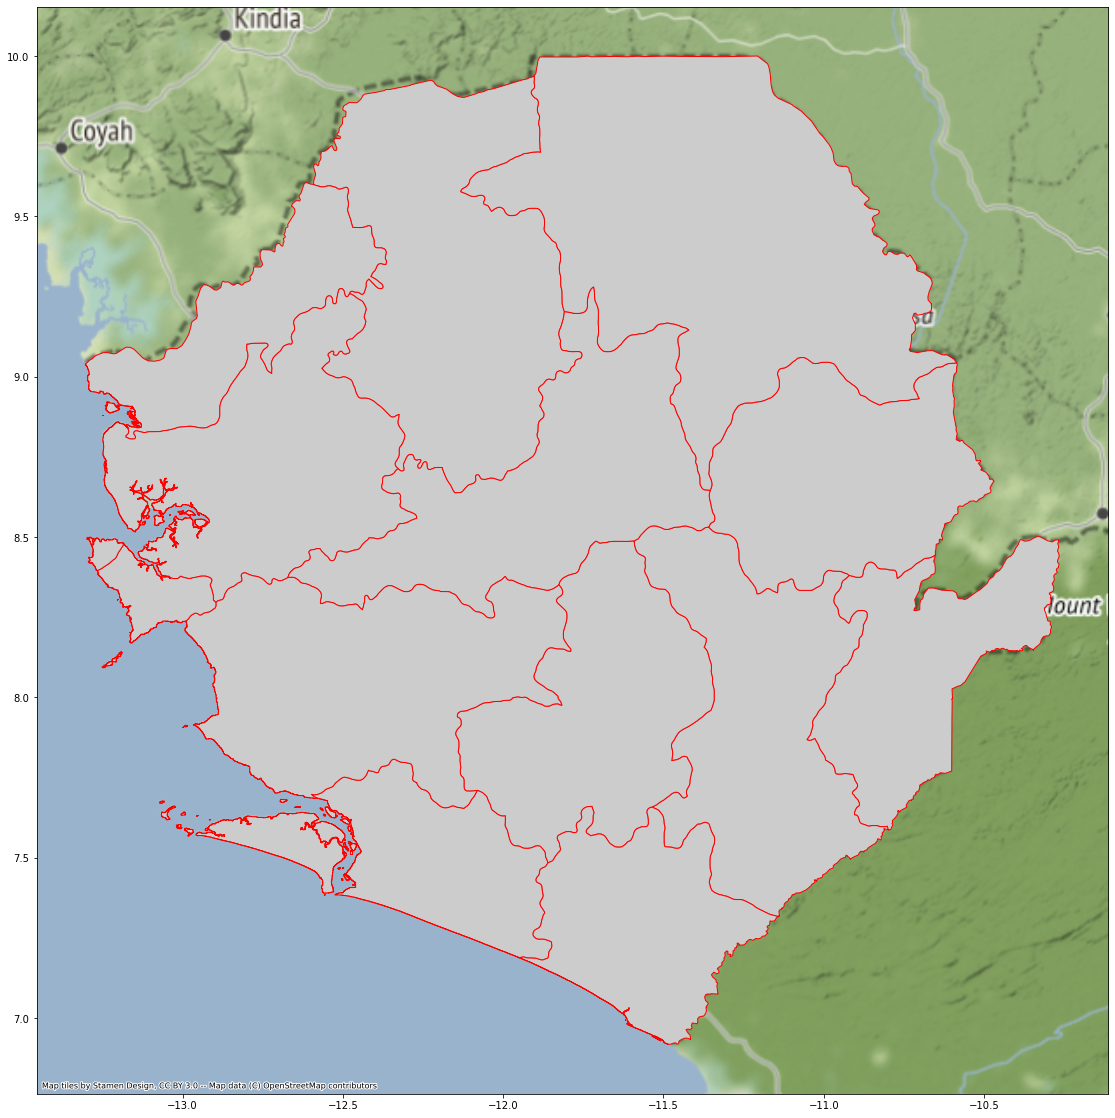

In [60]:
## plot maps
## 1. sl_districts
ax = sl_dis.plot(figsize=(20,20), color ='#CCCCCC', edgecolor='#FF0000')
ctx.add_basemap(ax, crs=df2.crs)
# ax = sl_dis.plot(figsize=(20,20), color ='#CCCCCC', edgecolor='#FF0000')

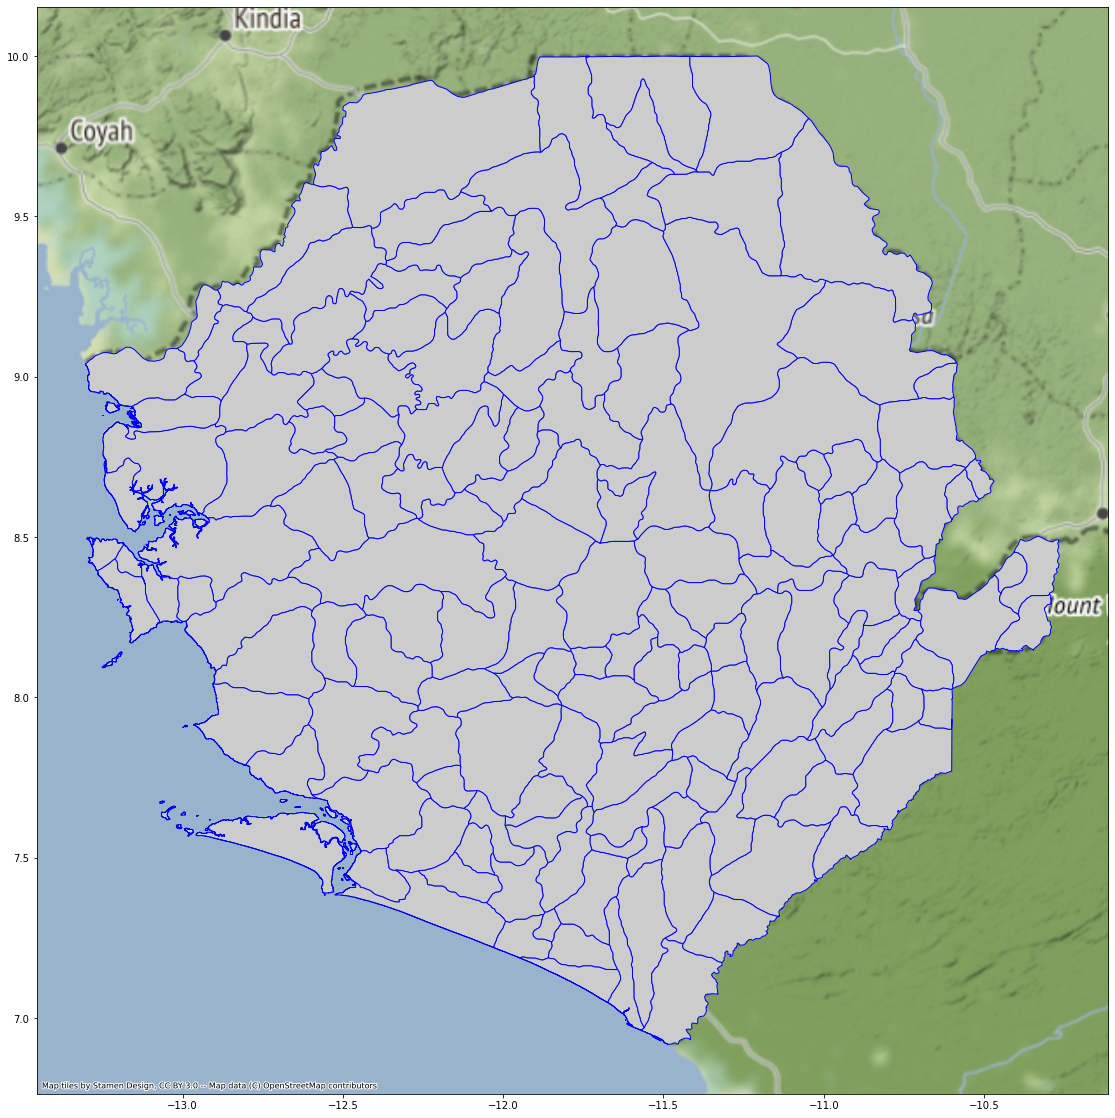

In [61]:
## plot maps
## 2. sl_chiefdoms
ax = sl_chief.plot(figsize=(20,20), color ='#CCCCCC', edgecolor='blue')
ctx.add_basemap(ax, crs=df2.crs)
# ax = sl_dis.plot(figsize=(20,20), color ='#CCCCCC', edgecolor='#FF0000')

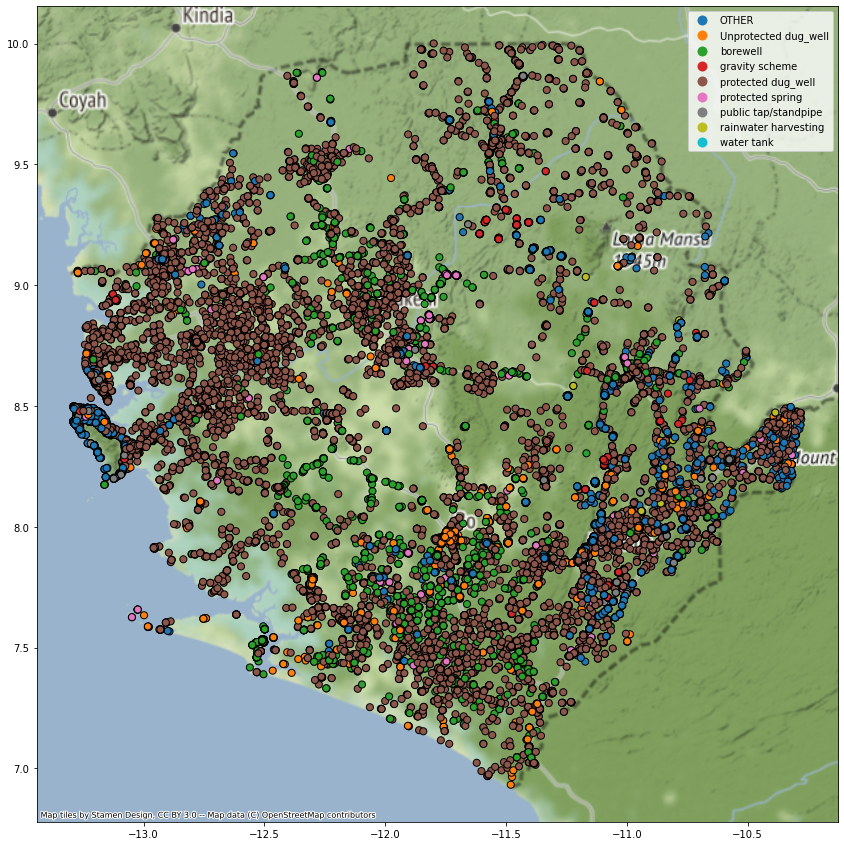

In [62]:
## plot maps
## 3. Water point maps by wp_type
ax = df2.plot(figsize=(15,15), column='wp_type', markersize = 50, edgecolor='black', legend = True)
ctx.add_basemap(ax, crs=df2.crs)
# ax = sl_dis.plot(figsize=(20,20), color ='#CCCCCC', edgecolor='#FF0000')

In [63]:
## exporting to geopackage
# import fiona; help(fiona.open)

sl_dis.to_file("WP_SL.gpkg", layer='Districts', driver="GPKG")
sl_chief.to_file("WP_SL.gpkg", layer='Chiefdoms', driver="GPKG")
df2.to_file("WP_SL.gpkg", layer='Water Points', driver="GPKG")

## Closing remarks

The data saved will be used in the "" notebook.

<hr />
<img src="my_logo.png" style="float:center" width="80px" />
<p><center>© 2022 <a href="http://www.Envirodatrics.com/">Envirodatrics</a> — <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY</a></center></p>